In [32]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import statistics
import kmax as kx
import utility as util
from hierarchy import *
from scipy.optimize import fsolve
from IPython.core.debugger import set_trace

# Simulations 2

## Length case ($\omega_e=1$)

In [37]:
def iterate_GWBP_EX_N(lam, num_samples=100):
    X_Ns = []
    for _ in range(num_samples):
        # Poisson Branching
        sample_tree = nx.Graph(GWBP(lam, MAXLEVEL=100))
        for u,v in sample_tree.edges():
            sample_tree[u][v]['weight'] = 1

        # Get X for sample_tree
        _,_,X = util.path_cover(sample_tree, list(sample_tree.nodes())[0])
            
        # Calculate X/N for current sample
        # GW Branching Process produces a single connected (tree) component, so N = |V|
        X_Ns.append(X / nx.number_of_nodes(sample_tree))
    return X_Ns

def X_sample_GNP(sample_tree):
    X = 0
    for nodes in nx.connected_components(sample_tree):
        subgraph = sample_tree.subgraph(nodes)
        _, _, Xi = util.path_cover(subgraph, list(nodes)[0])
        X += Xi
    return X

def iterate_GNP(lam, num_samples=1000, n=10000):
    X_Ns = []
    for _ in range(num_samples):
        # Erdos-Reyni Graph
        sample_tree = nx.fast_gnp_random_graph(n, lam/n)
        for u,v in sample_tree.edges():
            sample_tree[u][v]['weight'] = 1

        # Calculate X/n for current sample
        X_Ns.append(X_sample_GNP(sample_tree) / n)
    return X_Ns

def generate_histogram(l, dataset):
    bins = np.arange(0,100,1)
    plt.figure(figsize=(10,8))
    plt.hist(dataset, bins=bins, edgecolor = 'black', linewidth=1.2, color = 'lightblue')
    plt.xticks(np.arange(0,100,5))
    plt.title(f"lambda = {l}", fontfamily=['Serif'])
    plt.xlabel("100 * X_N / N", fontfamily=['Serif'], fontsize = 12)
    plt.show()

In [34]:
#generate data will save to csv
LAM = 0.7
GWBP_XNs = iterate_GWBP_EX_N(LAM, 10000)
GWBP_XNs_modified = [100 * x for x in GWBP_XNs]

In [39]:
LAM = 0.7
ER_XNs = iterate_GNP(0.7, 1000, 10000)
ER_XNs_modified = [100 * x for x in ER_XNs]

### Histogram

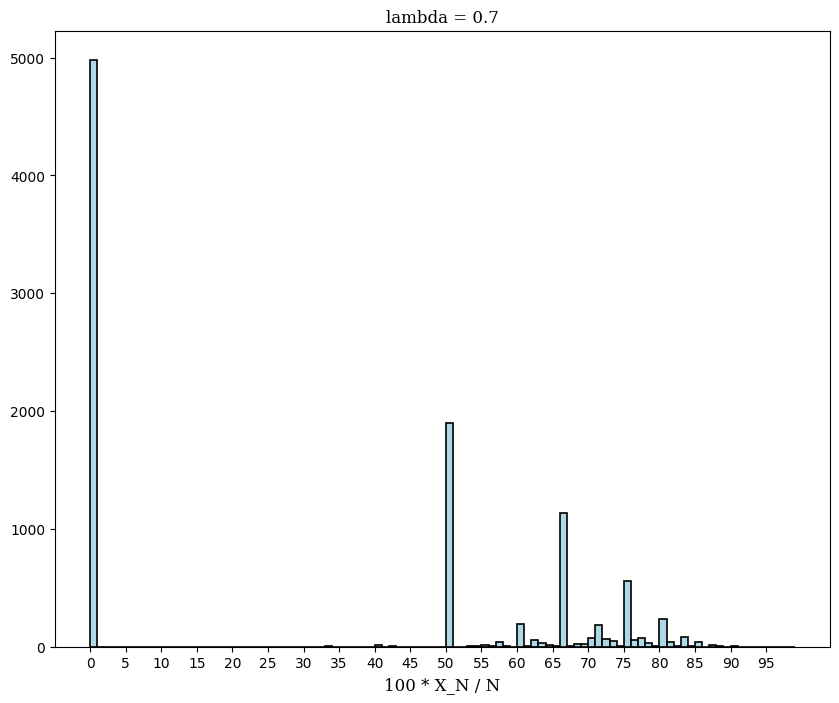

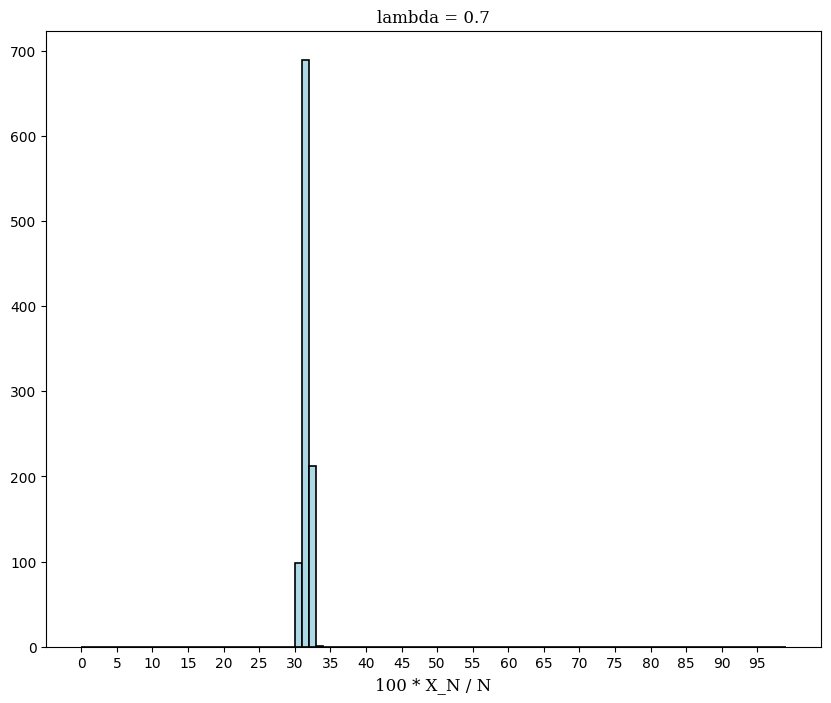

In [40]:
generate_histogram(LAM, GWBP_XNs_modified)
generate_histogram(LAM, ER_XNs_modified)

### q-q Plot

## Weight case ($\omega_e\sim\mathcal{U}(0,1)$)